# Strategic Analytics in Fashion: Transforming Consumer Data into Business Decision


> By: Jessica Feto








### This script is part of the Strategic Analytics in Fashion project.

**Purpose:**
For this project, a specific dataset was utilized, which was sourced from Kaggle.
This dataset was chosen for its relevance and comprehensiveness, making it highly suitable for the analysis and objectives of this project. The insights derived from this dataset have been instrumental in driving the project's success.

**Dataset Details:**
> **Dataset Name:** Fashion Dataset UK-US

> **Kaggle Link:** https://www.kaggle.com/datasets/a23bisola/fashion-dataset-uk-us

> **Description:** The Fashion Sales Dataset is a comprehensive and meticulously curated dataset designed to mimic the real sales process in the fashion industry. This dataset provides valuable insights into the dynamics of the fashion market and serves as a reliable resource for analyzing sales trends, forecasting demand, and optimizing business strategies.
Collected and updated on a weekly basis, the Fashion Sales Dataset encompasses a wide range of attributes that capture the intricacies of the fashion market. It offers a realistic representation of sales transactions, customer preferences, and product characteristics, enabling researchers, analysts, and industry professionals to gain deep insights into consumer behavior and make informed decisions.

> **Usage:**
In the "Strategic Analytics in Fashion" project, I used the Fashion Sales Dataset from Kaggle, which was very helpful. This dataset gave me a lot of information about what customers buy, what they like, and details about different fashion products. I did various types of analysis with this data. For example, I looked at what's popular in fashion, divided the market into different customer groups, and studied what customers like and dislike. I used special analysis methods to find out more from the data, like figuring out how customers feel about products from their reviews, predicting future fashion trends, and understanding what makes customers happy. This dataset was great because it had so much information, and it helped me create practical plans that can really be used in the fashion business.

### Data Understanding

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/mock_fashion_data_uk_us.csv')
df.head()

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492.0,Streetwear,"M, L, XL",XL,Green,Medium,24.0,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57.0,Vintage,"M, L, XL",XL,Black,Above Average,61.0,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197.0,Streetwear,"S, M, L",M,Blue,Average,27.0,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473.0,Formal,"S, M, L",L,Red,Very High,50.0,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55.0,Sporty,"M, L, XL",S,Green,Above Average,23.0,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


In [ ]:
#summary statistics and data types
dataset_info = df.info()
dataset_describe = df.describe()

dataset_info , dataset_describe
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29730 entries, 0 to 29729
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Product Name                  29730 non-null  object 
 1   Price                         29730 non-null  float64
 2   Brand                         29730 non-null  object 
 3   Category                      29730 non-null  object 
 4   Description                   29730 non-null  object 
 5   Rating                        29730 non-null  float64
 6   Review Count                  29729 non-null  float64
 7   Style Attributes              29729 non-null  object 
 8   Total Sizes                   29729 non-null  object 
 9   Available Sizes               29729 non-null  object 
 10  Color                         29729 non-null  object 
 11  Purchase History              29729 non-null  object 
 12  Age                           29729 non-null  float64
 13  F

(29730, 20)

In [ ]:
#check for missing values
missing_values = df.isnull().sum()
missing_values

Product Name                    0
Price                           0
Brand                           0
Category                        0
Description                     0
Rating                          0
Review Count                    1
Style Attributes                1
Total Sizes                     1
Available Sizes                 1
Color                           1
Purchase History                1
Age                             1
Fashion Magazines               1
Fashion Influencers             1
Season                          1
Time Period Highest Purchase    1
Customer Reviews                1
Social Media Comments           1
feedback                        1
dtype: int64

### Data Cleaning and Preprocessing

In [ ]:
#handling missing values
df_cleaned = df.dropna()
new_shape = df_cleaned.shape
new_shape

(29729, 20)

In [ ]:
# removing 'Product Name' becasue it doesnt contain useful informaiton in this case
df_cleaned = df.drop(columns=['Product Name'])

### Data Visualisation

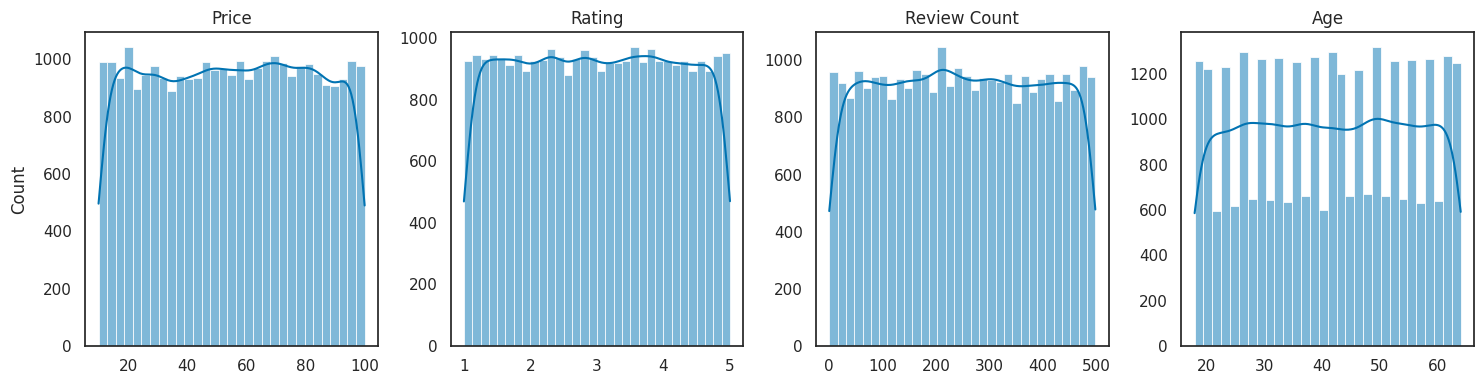

In [ ]:
# distribution of numerical variables
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="colorblind")

numerical_features = df_cleaned.select_dtypes(include = ['float64','int64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_features), figsize=(15,4))
for i, feature in enumerate(numerical_features):
  sns.histplot(df_cleaned[feature], ax=axes[i], kde=True)
  axes[i].set_title(f'{feature}')
  axes[i].set_xlabel('')
  if i > 0:
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()


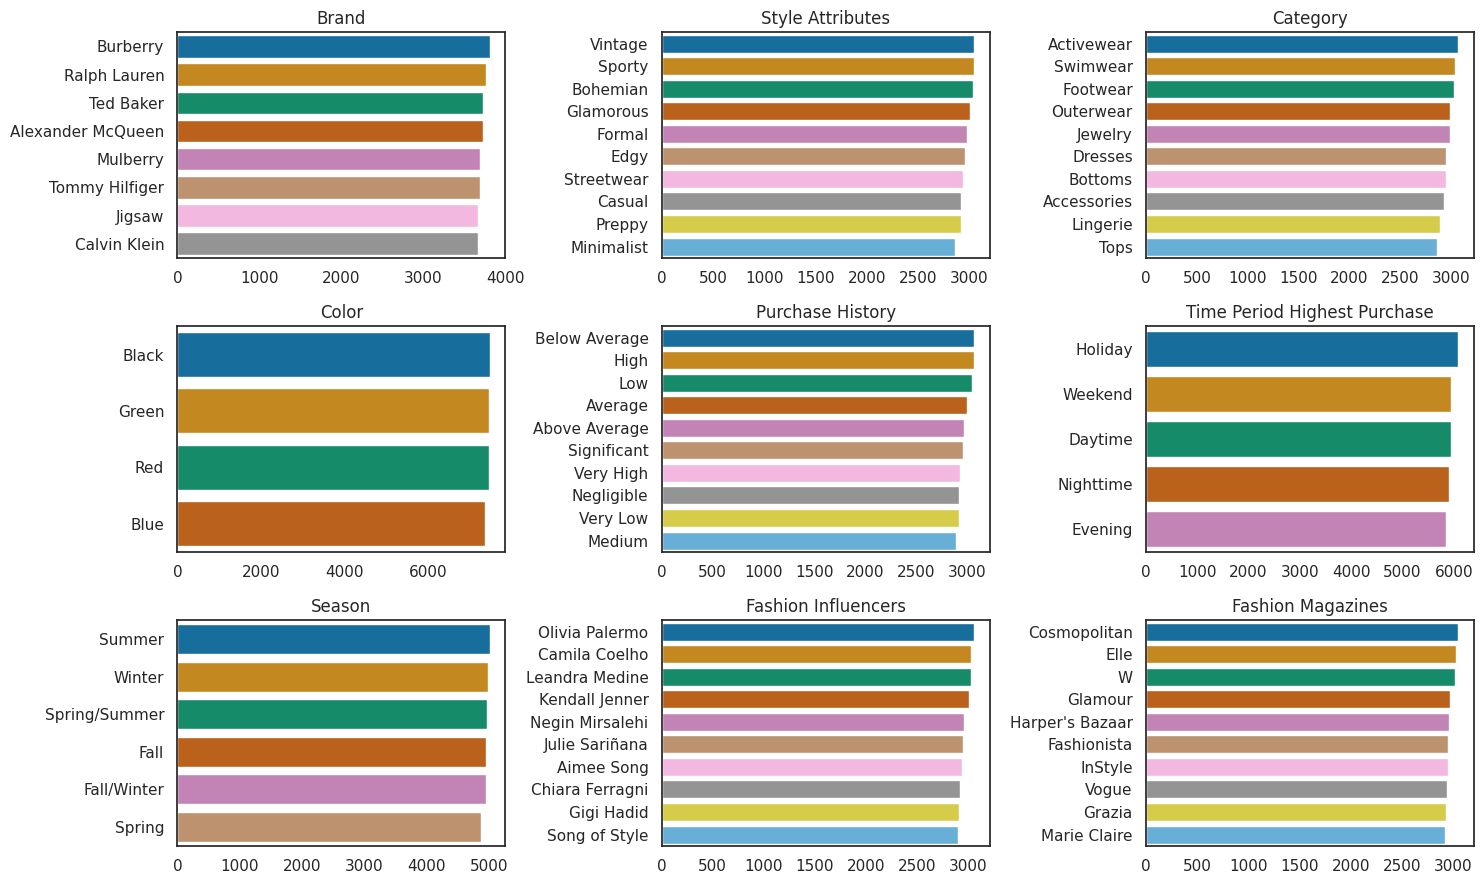

In [ ]:
# Selecting the desired categorical features for visualization
selected_features = ['Brand', 'Style Attributes', 'Category', 'Color', 'Purchase History',
                     'Time Period Highest Purchase', 'Season', 'Fashion Influencers', 'Fashion Magazines']

cols_per_row = 3
rows_needed = -(-len(selected_features) // cols_per_row)

fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, 3*rows_needed))
if axes.ndim == 1:
    axes = axes.reshape(1, -1)

for i, feature in enumerate(selected_features):
    row = i // cols_per_row
    col = i % cols_per_row
    sns.countplot(data=df_cleaned, y=feature, ax=axes[row, col], order=df_cleaned[feature].value_counts().index)
    axes[row, col].set_title(f'{feature}')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')
plt.tight_layout()
plt.show()


### Feature Engineering

In [ ]:
# displaying unique values
unique_values = {
    'Brand': df_cleaned['Brand'].unique(),
    'Category': df_cleaned['Category'].unique(),
    'Description': df_cleaned['Description'].unique(),
    'Style Attributes': df_cleaned['Style Attributes'].unique(),
    'Total Sizes': df_cleaned['Total Sizes'].unique(),
    'Available Sizes': df_cleaned['Available Sizes'].unique(),
    'Purchase History': df_cleaned['Purchase History'].unique(),
    "Fashion Magazines": df_cleaned["Fashion Magazines"].unique(),
    "Fashion Influencers": df_cleaned["Fashion Influencers"].unique(),
    "Season": df_cleaned["Season"].unique(),
    "Time Period Highest Purchase": df_cleaned["Time Period Highest Purchase"].unique(),
    "Customer Reviews": df_cleaned["Customer Reviews"].unique(),
    "Social Media Comments": df_cleaned["Social Media Comments"].unique(),
    "feedback": df_cleaned["feedback"].unique()
}

unique_values

{'Brand': array(['Ralph Lauren', 'Ted Baker', 'Jigsaw', 'Alexander McQueen',
        'Tommy Hilfiger', 'Calvin Klein', 'Mulberry', 'Burberry'],
       dtype=object),
 'Category': array(['Footwear', 'Tops', 'Outerwear', 'Bottoms', 'Accessories',
        'Dresses', 'Swimwear', 'Activewear', 'Lingerie', 'Jewelry'],
       dtype=object),
 'Description': array(['Bad', 'Not Good', 'Very Bad', 'Very Good', 'Best', 'Good',
        'Worst'], dtype=object),
 'Style Attributes': array(['Streetwear', 'Vintage', 'Formal', 'Sporty', 'Edgy', 'Minimalist',
        'Preppy', 'Glamorous', 'Casual', 'Bohemian', nan], dtype=object),
 'Total Sizes': array(['M, L, XL', 'S, M, L', 'S, L, XL', nan], dtype=object),
 'Available Sizes': array(['XL', 'M', 'L', 'S', nan], dtype=object),
 'Purchase History': array(['Medium', 'Above Average', 'Average', 'Very High', 'Negligible',
        'Very Low', 'Significant', 'Below Average', 'Low', 'High', nan],
       dtype=object),
 'Fashion Magazines': array(['Vogue', 'Glam

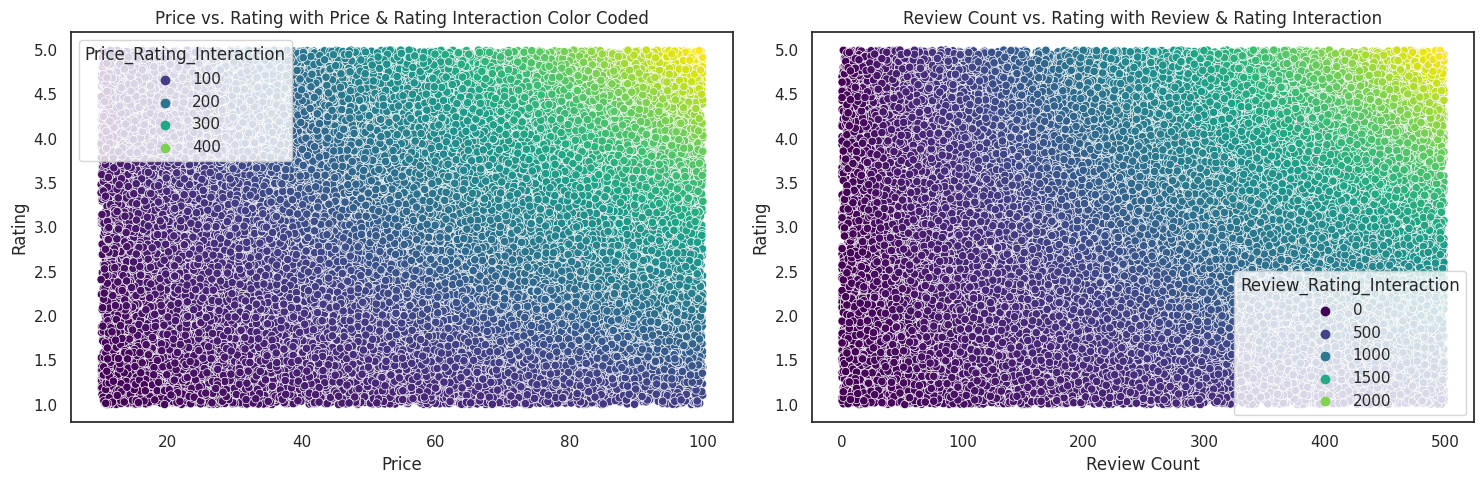

In [ ]:
# creating more interaction features

df_cleaned['Price_Rating_Interaction'] = df_cleaned['Price'] * df_cleaned['Rating']
df_cleaned['Review_Rating_Interaction'] = df_cleaned['Review Count'] * df_cleaned['Rating']
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# scatter plot for Price & Rating Interaction
sns.scatterplot(data=df_cleaned, x='Price', y='Rating', hue='Price_Rating_Interaction', ax=axes[0], palette="viridis")
axes[0].set_title('Price vs. Rating with Price & Rating Interaction Color Coded')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Rating')

# scatter plot for Review Count & Rating Interaction
sns.scatterplot(data=df_cleaned, x='Review Count', y='Rating', hue='Review_Rating_Interaction', ax=axes[1], palette="viridis")
axes[1].set_title('Review Count vs. Rating with Review & Rating Interaction')
axes[1].set_xlabel('Review Count')
axes[1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

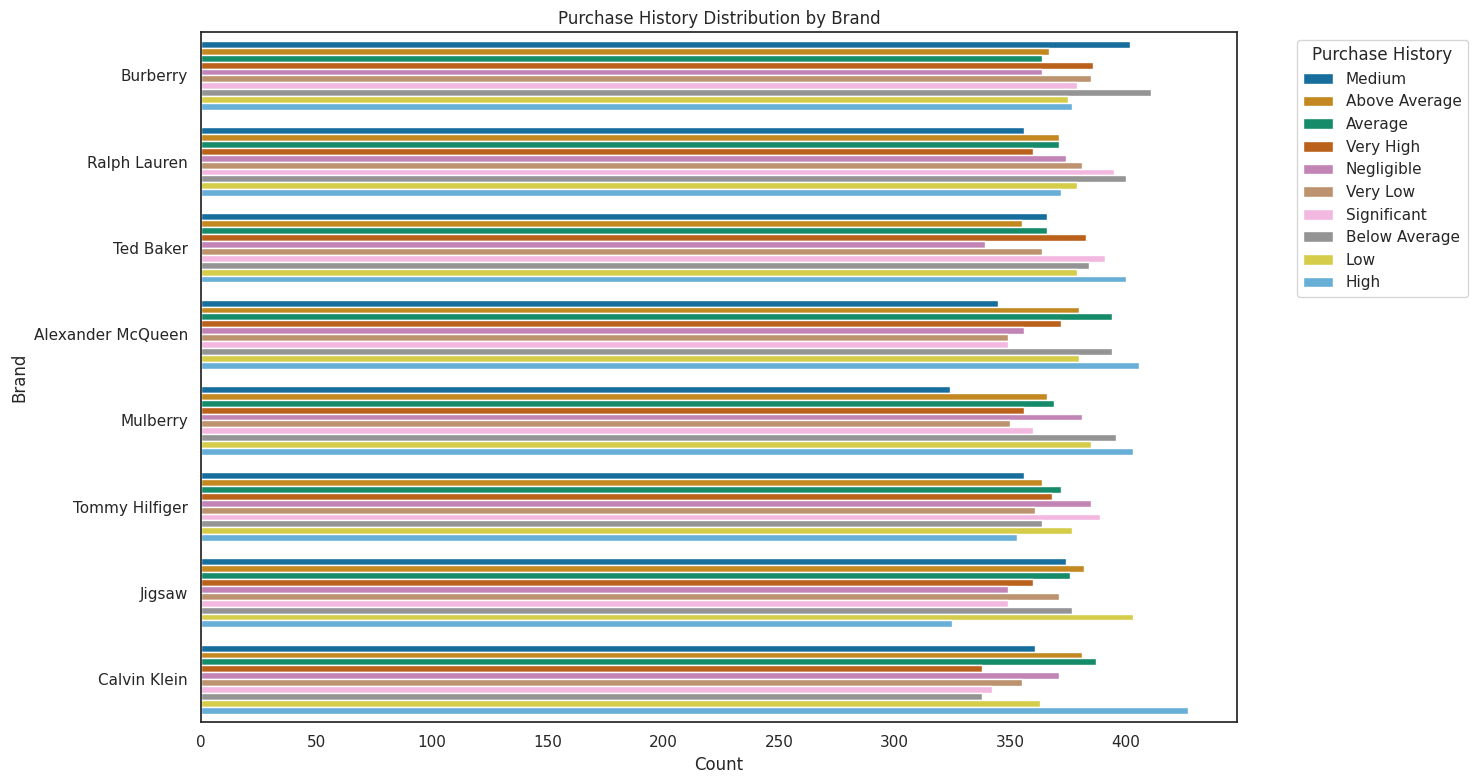

In [ ]:
# Visualizing Purchase History for Brands
plt.figure(figsize=(15, 8))
sns.countplot(data=df_cleaned, y='Brand', hue='Purchase History', order=df_cleaned['Brand'].value_counts().index)
plt.title('Purchase History Distribution by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.legend(title='Purchase History', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


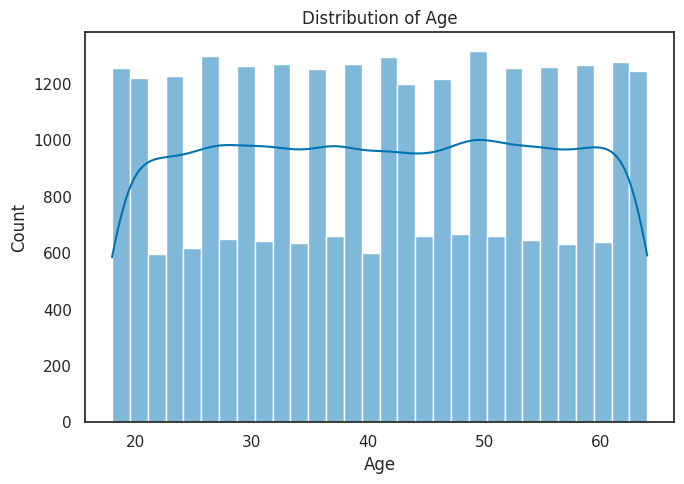

In [ ]:
# distribution of age
plt.figure(figsize=(7, 5))
sns.histplot(df_cleaned['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


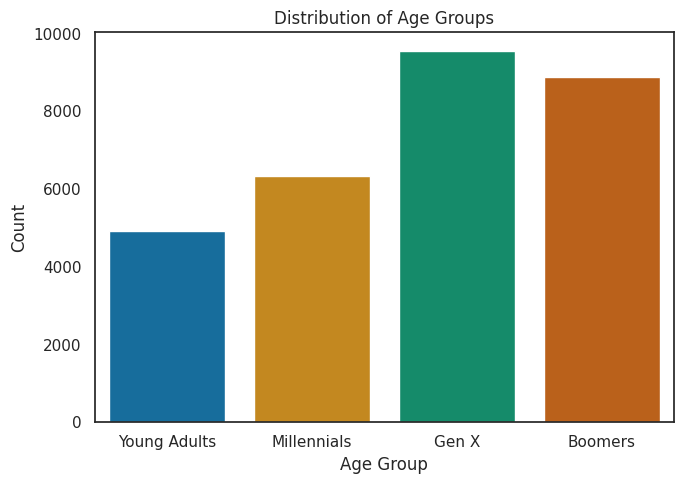

In [ ]:
# binning age groups and visualising the distribution of them
bins = [18, 25, 35, 50, 64]
labels = ['Young Adults', 'Millennials', 'Gen X', 'Boomers']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

plt.figure(figsize=(7, 5))
sns.countplot(data=df_cleaned, x='Age_Group', order=labels)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


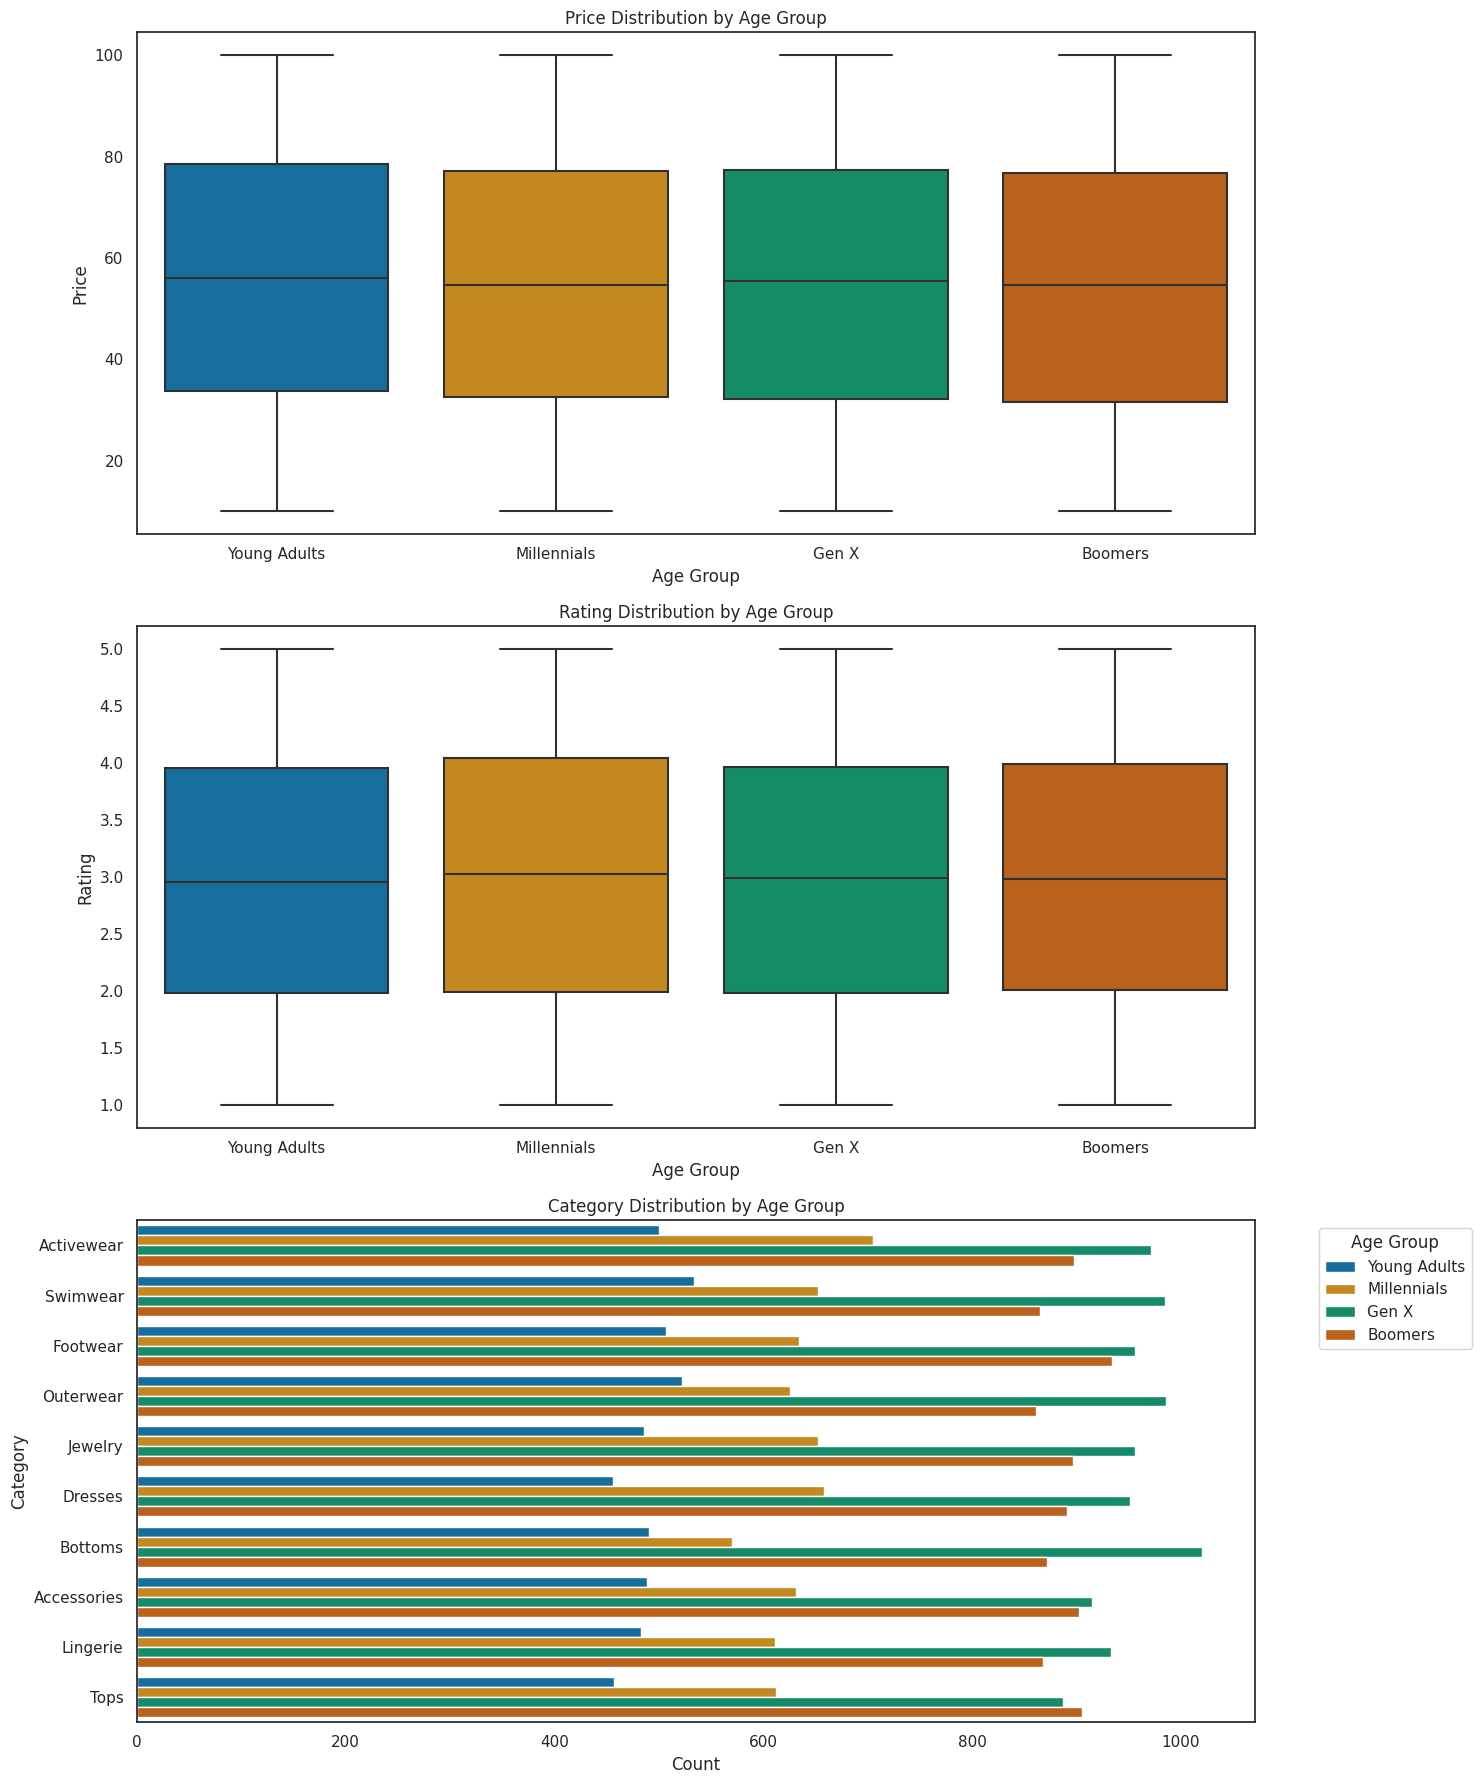

In [ ]:
# now checking age group vs price, rating and category
fig, axes = plt.subplots(3, 1, figsize=(15, 18))

# Age Group vs. Price
sns.boxplot(data=df_cleaned, x='Age_Group', y='Price', ax=axes[0], order=labels)
axes[0].set_title('Price Distribution by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Price')

# Age Group vs. Rating
sns.boxplot(data=df_cleaned, x='Age_Group', y='Rating', ax=axes[1], order=labels)
axes[1].set_title('Rating Distribution by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Rating')

# Age Group vs. Category
category_order = df_cleaned['Category'].value_counts().index
sns.countplot(data=df_cleaned, y='Category', hue='Age_Group', ax=axes[2], order=category_order)
axes[2].set_title('Category Distribution by Age Group')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Category')
axes[2].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


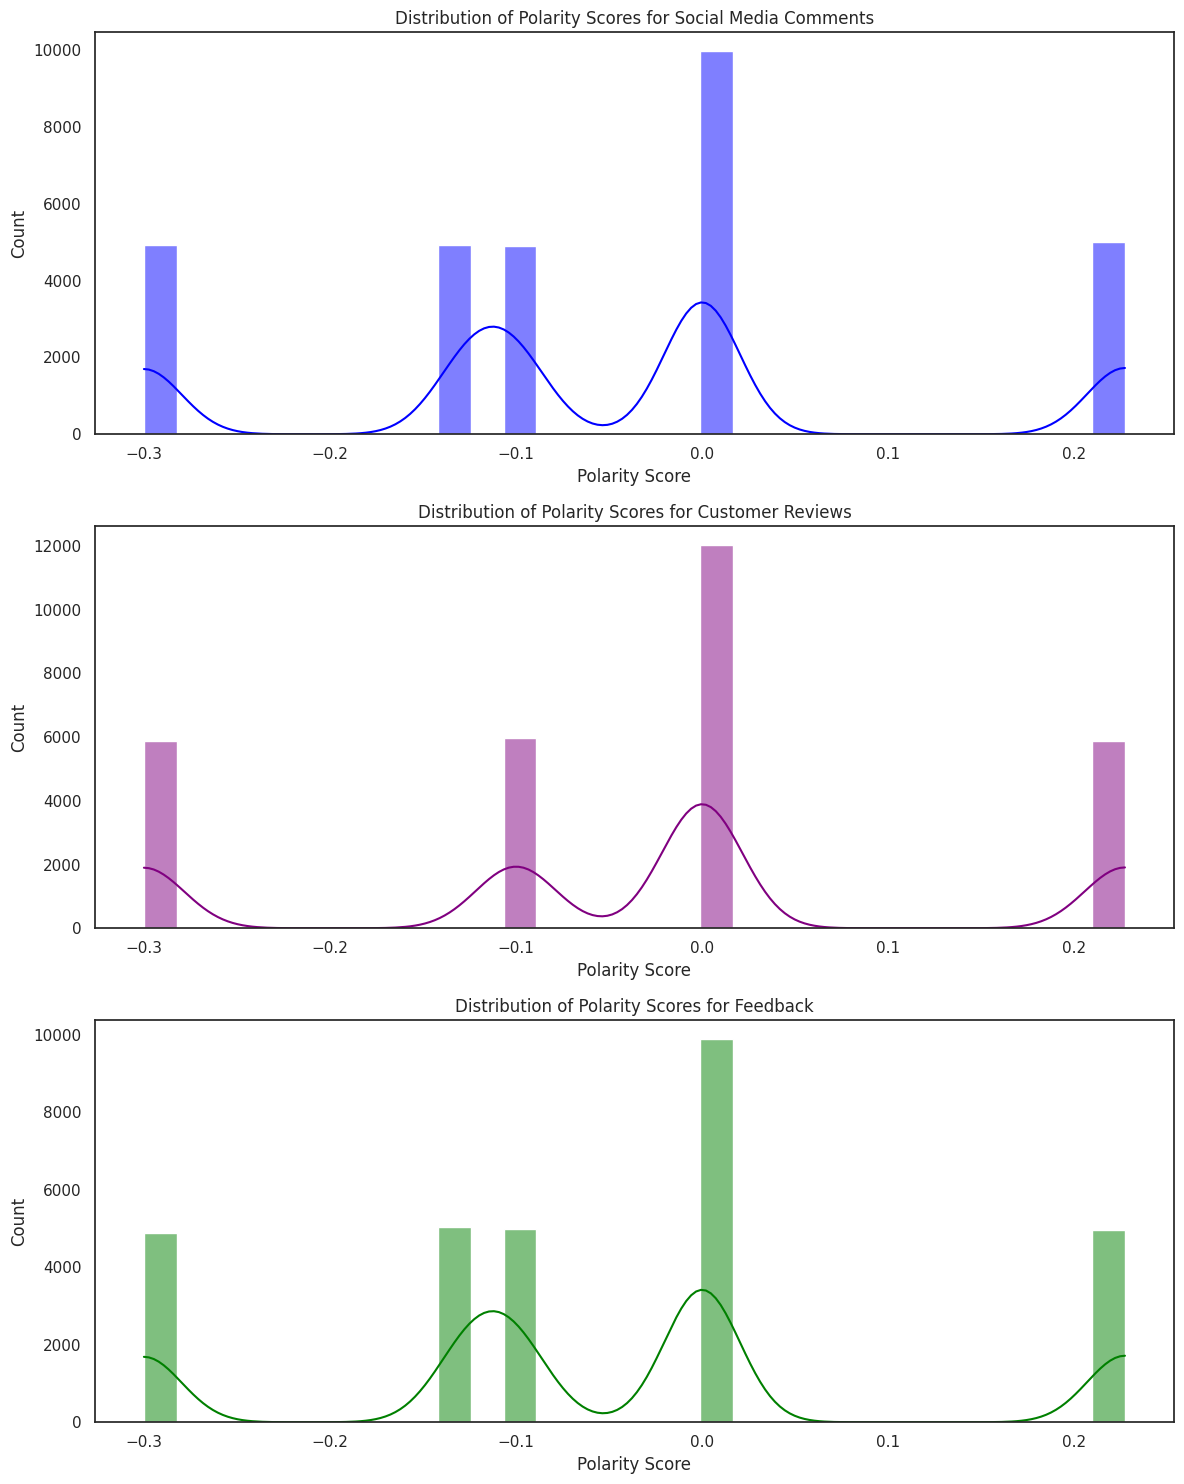

,Social Media Comments,Customer Reviews,feedback,Social_Media_Comments_Polarity,Customer_Reviews_Polarity,Feedback_Polarity
0,Mixed,Mixed,Other,0.000,0.000000,-0.125000
1,Neutral,Negative,Other,0.000,-0.300000,-0.125000
2,Negative,Unknown,Neutral,-0.300,-0.100000,0.000000
3,Other,Neutral,Other,-0.125,0.000000,-0.125000
4,Mixed,Positive,Positive,0.000,0.227273,0.227273


In [ ]:
# computing the polarity of Feedback, Social Media Comments and Cusomter Reviews
from textblob import TextBlob

def compute_polarity(text): # function to compute ploarity
    return TextBlob(str(text)).sentiment.polarity

# calculating polarity scores for 'Social Media Comments', 'Customer Reviews', and 'feedback'
sentiment_data = df_cleaned[['Social Media Comments', 'Customer Reviews', 'feedback']].copy()
sentiment_data['Social_Media_Comments_Polarity'] = sentiment_data['Social Media Comments'].apply(compute_polarity)
sentiment_data['Customer_Reviews_Polarity'] = sentiment_data['Customer Reviews'].apply(compute_polarity)
sentiment_data['Feedback_Polarity'] = sentiment_data['feedback'].apply(compute_polarity)

# Visualizing the polarity scores
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Social Media Comments Polarity
sns.histplot(sentiment_data['Social_Media_Comments_Polarity'], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title('Distribution of Polarity Scores for Social Media Comments')
axes[0].set_xlabel('Polarity Score')
axes[0].set_ylabel('Count')

# Customer Reviews Polarity
sns.histplot(sentiment_data['Customer_Reviews_Polarity'], bins=30, kde=True, ax=axes[1], color="purple")
axes[1].set_title('Distribution of Polarity Scores for Customer Reviews')
axes[1].set_xlabel('Polarity Score')
axes[1].set_ylabel('Count')

# Feedback Polarity
sns.histplot(sentiment_data['Feedback_Polarity'], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title('Distribution of Polarity Scores for Feedback')
axes[2].set_xlabel('Polarity Score')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

sentiment_data.head()


Social Media Comments: The distribution reveals that the majority of comments are neutral, but there are also a considerable number of both positive and negative comments.


Customer Reviews: Similarly, the majority of reviews are neutral, but we also observe peaks in the positive and negative areas.


Feedback: This distribution is more varied, with a significant number of feedbacks being neutral. However, there are distinct peaks in both positive and negative directions.



---



---



In [ ]:
# feature selection

# One-Hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=[
    'Brand', 'Category', 'Style Attributes', 'Color',
    'Fashion Magazines', 'Fashion Influencers', 'Time Period Highest Purchase'
], drop_first=True)

# ordinal encoding
description_mapping = {
    'Worst': 1,
    'Very Bad': 2,
    'Bad': 3,
    'Not Good': 4,
    'Good': 5,
    'Very Good': 6,
    'Best': 7
}

purchase_history_mapping = {
    'Negligible': 1,
    'Very Low': 2,
    'Low': 3,
    'Below Average': 4,
    'Average': 5,
    'Medium': 6,
    'Above Average': 7,
    'High': 8,
    'Very High': 9,
    'Significant': 10
}

season_mapping = {
    'Spring': '1',
    'Summer': '2',
    'Fall': '3',
    'Winter': '4',
    'Fall/Winter': '5',
    'Spring/Summer': '6'

}

df_encoded['Season_Encoded'] = df_encoded['Season'].map(season_mapping)


df_encoded['Description'] = df_encoded['Description'].map(description_mapping)
df_encoded['Purchase History'] = df_encoded['Purchase History'].map(purchase_history_mapping)

In [ ]:
#dropping unneded columns
columns_to_drop = ['Season', 'Age_Group','Social Media Comments', 'feedback', 'Customer Reviews',
                   'Total Sizes', 'Available Sizes']
df_encoded = df_encoded.drop(columns=columns_to_drop)

In [ ]:
# Creating new features for classification tasks
df_encoded['Satisfaction'] = df_encoded['Rating']
df_encoded['Is_Satisfied'] = df_encoded['Rating'].apply(lambda x: 1 if x > 3 else 0)

df_encoded['Interested'] = df_encoded['Purchase History'].apply(lambda x: 1 if x > 5 else 0)

available_categories = [col for col in df_encoded.columns if 'Category_' in col]
df_encoded['Has_Purchased_Category'] = df_encoded[available_categories].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

df_encoded['Frequent_Season'] = df_encoded['Season_Encoded']
df_encoded['Is_Holiday_Shopper'] = df_encoded['Time Period Highest Purchase_Holiday'].apply(lambda x: 1 if x == 1 else 0)


,Price,Description,Rating,Review Count,Purchase History,Age,Price_Rating_Interaction,Review_Rating_Interaction,Brand_Burberry,Brand_Calvin Klein,...,Time Period Highest Purchase_Holiday,Time Period Highest Purchase_Nighttime,Time Period Highest Purchase_Weekend,Season_Encoded,Satisfaction,Is_Satisfied,Interested,Has_Purchased_Category,Frequent_Season,Is_Holiday_Shopper
0,97.509966,3,1.421706,492.0,6.0,24.0,138.630494,699.479303,0,0,...,0,0,0,5,1.421706,0,1,1,5,0
1,52.341277,4,1.037677,57.0,7.0,61.0,54.313333,59.147582,0,0,...,0,0,1,4,1.037677,0,1,1,4,0
2,15.430975,2,3.967106,197.0,5.0,27.0,61.216319,781.519935,0,0,...,0,1,0,2,3.967106,1,0,1,2,0
3,81.116542,4,2.844659,473.0,9.0,50.0,230.748875,1345.523552,0,0,...,0,0,1,5,2.844659,0,1,1,5,0
4,31.633686,6,1.183242,55.0,7.0,23.0,37.430321,65.078337,0,0,...,0,0,0,1,1.183242,0,1,1,1,0


In [ ]:
df_encoded

,Price,Description,Rating,Review Count,Purchase History,Age,Price_Rating_Interaction,Review_Rating_Interaction,Brand_Burberry,Brand_Calvin Klein,...,Time Period Highest Purchase_Holiday,Time Period Highest Purchase_Nighttime,Time Period Highest Purchase_Weekend,Season_Encoded,Satisfaction,Is_Satisfied,Interested,Has_Purchased_Category,Frequent_Season,Is_Holiday_Shopper
0,97.509966,3,1.421706,492.0,6.0,24.0,138.630494,699.479303,0,0,...,0,0,0,5,1.421706,0,1,1,5,0
1,52.341277,4,1.037677,57.0,7.0,61.0,54.313333,59.147582,0,0,...,0,0,1,4,1.037677,0,1,1,4,0
2,15.430975,2,3.967106,197.0,5.0,27.0,61.216319,781.519935,0,0,...,0,1,0,2,3.967106,1,0,1,2,0
3,81.116542,4,2.844659,473.0,9.0,50.0,230.748875,1345.523552,0,0,...,0,0,1,5,2.844659,0,1,1,5,0
4,31.633686,6,1.183242,55.0,7.0,23.0,37.430321,65.078337,0,0,...,0,0,0,1,1.183242,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29725,67.513910,7,3.521432,407.0,1.0,57.0,237.745645,1433.222827,0,0,...,1,0,0,1,3.521432,1,0,1,1,1
29726,64.252900,5,1.494116,427.0,10.0,38.0,96.001266,637.987404,0,0,...,1,0,0,4,1.494116,0,1,0,4,1
29727,48.939186,5,2.919794,67.0,3.0,30.0,142.892355,195.626217,0,0,...,0,0,0,2,2.919794,0,0,1,2,0
29728,93.467998,5,3.710854,272.0,1.0,64.0,346.846105,1009.352318,0,1,...,1,0,0,6,3.710854,1,0,1,6,1


In [ ]:
# Identifying columns with NaN values in the encoded dataset
nan_columns = df_encoded.columns[df_encoded.isnull().any()]
nan_values_count = df_encoded[nan_columns].isnull().sum()
nan_values_count

Review Count                 1
Purchase History             1
Age                          1
Review_Rating_Interaction    1
Season_Encoded               1
Frequent_Season              1
dtype: int64

In [ ]:
# Filling missing values for the identified columns

# Using median for numerical columns
numerical_cols = ['Review Count', 'Purchase History', 'Age', 'Review_Rating_Interaction']
for col in numerical_cols:
    median_val = df_encoded[col].median()
    df_encoded[col].fillna(median_val, inplace=True)

# Using mode for categorical encoded columns
categorical_cols = ['Season_Encoded', 'Frequent_Season']
for col in categorical_cols:
    mode_val = df_encoded[col].mode()[0]
    df_encoded[col].fillna(mode_val, inplace=True)

# Verifying if the NaN values have been handled
nan_columns_after = df_encoded.columns[df_encoded.isnull().any()]
nan_values_count_after = df_encoded[nan_columns_after].isnull().sum()
nan_values_count_after


Series([], dtype: float64)

# PCA

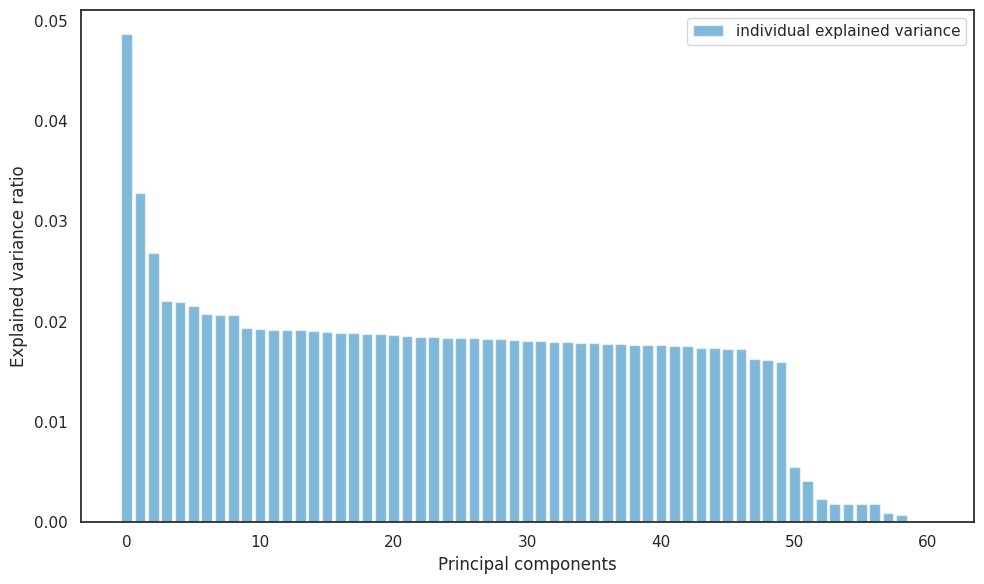

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extracting features and target for the classification tasks
X = df_encoded.drop(columns=['Is_Satisfied', 'Interested', 'Has_Purchased_Category', 'Is_Holiday_Shopper'])
y_satisfied = df_encoded['Is_Satisfied']
y_interested = df_encoded['Interested']
y_recommendation = df_encoded['Has_Purchased_Category']
y_seasonal = df_encoded['Is_Holiday_Shopper']

# Standardizing the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [ ]:
pca_10 = PCA(n_components=10)
X_pca_10 = pca_10.fit_transform(X_standardized)
X_pca_10.shape

(29730, 10)

In [ ]:
# splitting the data in train and test
from sklearn.model_selection import train_test_split

X_train_satisfied, X_test_satisfied, y_train_satisfied, y_test_satisfied = train_test_split(X_pca_10, y_satisfied, test_size=0.3, random_state=42)
X_train_interested, X_test_interested, y_train_interested, y_test_interested = train_test_split(X_pca_10, y_interested, test_size=0.3, random_state=42)
X_train_recommendation, X_test_recommendation, y_train_recommendation, y_test_recommendation = train_test_split(X_pca_10, y_recommendation, test_size=0.3, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X_pca_10, y_seasonal, test_size=0.3, random_state=42)

X_train_satisfied.shape, X_test_satisfied.shape


((20811, 10), (8919, 10))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


# Initializing classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Linear SVM": LinearSVC(max_iter=1000, random_state=42),
    "Kernel SVM": SVC(kernel="rbf", random_state=42),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

### Predicting Customer Satisfaction using Classificaion Models



In [ ]:
def evaluate_classifier_detailed(clf, X_train, y_train, X_test, y_test, classifier_name):
    # Training
    clf.fit(X_train, y_train)

    # Predicting
    y_pred = clf.predict(X_test)

    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['0', '1'])
    confusion = confusion_matrix(y_test, y_pred)

    # Creating the output string
    output_string = f"{classifier_name} Model Performance with PCA:\n"
    output_string += f"Accuracy: {accuracy:.2%}\n"
    output_string += "Classification Report:\n"
    output_string += report
    output_string += "\nConfusion Matrix:\n"
    output_string += f"{confusion[0][0]} {confusion[0][1]}\n"
    output_string += f"{confusion[1][0]} {confusion[1][1]}"

    return output_string

evaluation_strings = {}

for name, clf in classifiers.items():
    evaluation_strings[name] = evaluate_classifier_detailed(clf, X_train_satisfied, y_train_satisfied, X_test_satisfied, y_test_satisfied, name)

# To print the output for each classifier:
for name, result in evaluation_strings.items():
    print(result)
    print("\n" + "-"*50 + "\n")



Logistic Regression Model Performance:
Accuracy: 94.90%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4443
           1       0.95      0.95      0.95      4476

    accuracy                           0.95      8919
   macro avg       0.95      0.95      0.95      8919
weighted avg       0.95      0.95      0.95      8919

Confusion Matrix:
4214 229
226 4250

--------------------------------------------------

KNN Model Performance:
Accuracy: 92.99%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4443
           1       0.93      0.93      0.93      4476

    accuracy                           0.93      8919
   macro avg       0.93      0.93      0.93      8919
weighted avg       0.93      0.93      0.93      8919

Confusion Matrix:
4131 312
313 4163

--------------------------------------------------

Linear SVM Model Performan

### Predicting Customer Interest

In [ ]:
from sklearn.metrics import classification_report

def evaluate_classifier_detailed(clf, X_train, y_train, X_test, y_test, classifier_name):
    # Training
    clf.fit(X_train, y_train)

    # Predicting
    y_pred = clf.predict(X_test)

    # Computing metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['0', '1'])
    confusion = confusion_matrix(y_test, y_pred)

    # Creating the output string
    output_string = f"{classifier_name} Model Performance:\n"
    output_string += f"Accuracy: {accuracy:.2%}\n"
    output_string += "Classification Report:\n"
    output_string += report
    output_string += "\nConfusion Matrix:\n"
    output_string += f"{confusion[0][0]} {confusion[0][1]}\n"
    output_string += f"{confusion[1][0]} {confusion[1][1]}"

    return output_string

evaluation_strings = {}

for name, clf in classifiers.items():
    evaluation_strings[name] = evaluate_classifier_detailed(clf, X_train_interested, y_train_interested, X_test_interested, y_test_interested, name)

for name, result in evaluation_strings.items():
    print(result)
    print("\n" + "-"*50 + "\n")


Logistic Regression Model Performance:
Accuracy: 53.11%
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      4500
           1       0.53      0.52      0.52      4419

    accuracy                           0.53      8919
   macro avg       0.53      0.53      0.53      8919
weighted avg       0.53      0.53      0.53      8919

Confusion Matrix:
2454 2046
2136 2283

--------------------------------------------------

KNN Model Performance:
Accuracy: 50.42%
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.50      4500
           1       0.50      0.51      0.51      4419

    accuracy                           0.50      8919
   macro avg       0.50      0.50      0.50      8919
weighted avg       0.50      0.50      0.50      8919

Confusion Matrix:
2231 2269
2153 2266

--------------------------------------------------

Linear SVM Model Perfo

### Predicting Product Recommendation Likelyhood

In [ ]:
evaluation_strings = {}

for name, clf in classifiers.items():
    evaluation_strings[name] = evaluate_classifier_detailed(clf, X_train_recommendation, y_train_recommendation, X_test_recommendation, y_test_recommendation, name)

for name, result in evaluation_strings.items():
    print(result)
    print("\n" + "-"*50 + "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:124

Logistic Regression Model Performance:
Accuracy: 89.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       905
           1       0.90      1.00      0.95      8014

    accuracy                           0.90      8919
   macro avg       0.45      0.50      0.47      8919
weighted avg       0.81      0.90      0.85      8919

Confusion Matrix:
0 905
0 8014

--------------------------------------------------

KNN Model Performance:
Accuracy: 88.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.16      0.02      0.04       905
           1       0.90      0.99      0.94      8014

    accuracy                           0.89      8919
   macro avg       0.53      0.50      0.49      8919
weighted avg       0.82      0.89      0.85      8919

Confusion Matrix:
19 886
101 7913

--------------------------------------------------

Linear SVM Model Performance:
Acc

### Predicting Seasonal Shoppers

In [ ]:
evaluation_strings = {}

for name, clf in classifiers.items():
    evaluation_strings[name] = evaluate_classifier_detailed(clf, X_train_seasonal, y_train_seasonal, X_test_seasonal, y_test_seasonal, name)

for name, result in evaluation_strings.items():
    print(result)
    print("\n" + "-"*50 + "\n")

Logistic Regression Model Performance:
Accuracy: 95.53%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7134
           1       0.89      0.88      0.89      1785

    accuracy                           0.96      8919
   macro avg       0.93      0.93      0.93      8919
weighted avg       0.96      0.96      0.96      8919

Confusion Matrix:
6944 190
209 1576

--------------------------------------------------

KNN Model Performance:
Accuracy: 94.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7134
           1       0.89      0.81      0.85      1785

    accuracy                           0.94      8919
   macro avg       0.92      0.89      0.91      8919
weighted avg       0.94      0.94      0.94      8919

Confusion Matrix:
6958 176
333 1452

--------------------------------------------------

Linear SVM Model Performan

# LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Define the LDA object
lda = LDA(n_components=1)

# Fit and transform the training data for each classification task
X_train_lda_satisfied = lda.fit_transform(X_train_satisfied, y_train_satisfied)
X_test_lda_satisfied = lda.transform(X_test_satisfied)

X_train_lda_interested = lda.fit_transform(X_train_interested, y_train_interested)
X_test_lda_interested = lda.transform(X_test_interested)

X_train_lda_recommendation = lda.fit_transform(X_train_recommendation, y_train_recommendation)
X_test_lda_recommendation = lda.transform(X_test_recommendation)

X_train_lda_seasonal = lda.fit_transform(X_train_seasonal, y_train_seasonal)
X_test_lda_seasonal = lda.transform(X_test_seasonal)


### Predicting customer satisfaction using LDA


In [ ]:
# Evaluating classifiers using LDA-transformed data
evaluation_strings_lda = {}

for name, clf in classifiers.items():
    evaluation_strings_lda[name] = evaluate_classifier_detailed(clf, X_train_lda_satisfied, y_train_satisfied, X_test_lda_satisfied, y_test_satisfied, name)

# Print the output for each classifier:
for name, result in evaluation_strings_lda.items():
    print(result)
    print("\n" + "-"*50 + "\n")

Logistic Regression Model Performance:
Accuracy: 94.92%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4443
           1       0.95      0.95      0.95      4476

    accuracy                           0.95      8919
   macro avg       0.95      0.95      0.95      8919
weighted avg       0.95      0.95      0.95      8919

Confusion Matrix:
4216 227
226 4250

--------------------------------------------------

KNN Model Performance:
Accuracy: 94.06%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4443
           1       0.94      0.94      0.94      4476

    accuracy                           0.94      8919
   macro avg       0.94      0.94      0.94      8919
weighted avg       0.94      0.94      0.94      8919

Confusion Matrix:
4166 277
253 4223

--------------------------------------------------

Linear SVM Model Performan

### Predicting cusotmer interest using LDA

In [ ]:
# Evaluating classifiers using LDA-transformed data
evaluation_strings_lda = {}

for name, clf in classifiers.items():
    evaluation_strings_lda[name] = evaluate_classifier_detailed(clf, X_train_lda_interested, y_train_interested, X_test_lda_interested, y_test_interested, name)

# To print the output for each classifier:
for name, result in evaluation_strings_lda.items():
    print(result)
    print("\n" + "-"*50 + "\n")

Logistic Regression Model Performance:
Accuracy: 53.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.55      0.54      4500
           1       0.53      0.52      0.52      4419

    accuracy                           0.53      8919
   macro avg       0.53      0.53      0.53      8919
weighted avg       0.53      0.53      0.53      8919

Confusion Matrix:
2454 2046
2137 2282

--------------------------------------------------

KNN Model Performance:
Accuracy: 50.79%
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51      4500
           1       0.50      0.51      0.51      4419

    accuracy                           0.51      8919
   macro avg       0.51      0.51      0.51      8919
weighted avg       0.51      0.51      0.51      8919

Confusion Matrix:
2285 2215
2174 2245

--------------------------------------------------

Linear SVM Model Perfo

### Predicting product recommendation likelyhood using LDA

In [ ]:
# Evaluating classifiers using LDA-transformed data
evaluation_strings_lda = {}

for name, clf in classifiers.items():
    evaluation_strings_lda[name] = evaluate_classifier_detailed(clf, X_train_lda_recommendation, y_train_recommendation, X_test_lda_recommendation, y_test_recommendation, name)

for name, result in evaluation_strings_lda.items():
    print(result)
    print("\n" + "-"*50 + "\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Logistic Regression Model Performance:
Accuracy: 89.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       905
           1       0.90      1.00      0.95      8014

    accuracy                           0.90      8919
   macro avg       0.45      0.50      0.47      8919
weighted avg       0.81      0.90      0.85      8919

Confusion Matrix:
0 905
0 8014

--------------------------------------------------

KNN Model Performance:
Accuracy: 89.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.01      0.02       905
           1       0.90      0.99      0.94      8014

    accuracy                           0.89      8919
   macro avg       0.52      0.50      0.48      8919
weighted avg       0.82      0.89      0.85      8919

Confusion Matrix:
9 896
57 7957

--------------------------------------------------

Linear SVM Model Performance:
Accur

### Predicting seasonal shoppers using LDA

In [ ]:
# Evaluating classifiers using LDA-transformed data
evaluation_strings_lda = {}

for name, clf in classifiers.items():
    evaluation_strings_lda[name] = evaluate_classifier_detailed(clf, X_train_lda_seasonal, y_train_seasonal, X_test_lda_seasonal, y_test_seasonal, name)

for name, result in evaluation_strings_lda.items():
    print(result)
    print("\n" + "-"*50 + "\n")

Logistic Regression Model Performance:
Accuracy: 95.29%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7134
           1       0.89      0.87      0.88      1785

    accuracy                           0.95      8919
   macro avg       0.93      0.92      0.93      8919
weighted avg       0.95      0.95      0.95      8919

Confusion Matrix:
6940 194
226 1559

--------------------------------------------------

KNN Model Performance:
Accuracy: 94.80%
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7134
           1       0.87      0.87      0.87      1785

    accuracy                           0.95      8919
   macro avg       0.92      0.92      0.92      8919
weighted avg       0.95      0.95      0.95      8919

Confusion Matrix:
6896 238
226 1559

--------------------------------------------------

Linear SVM Model Performan

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


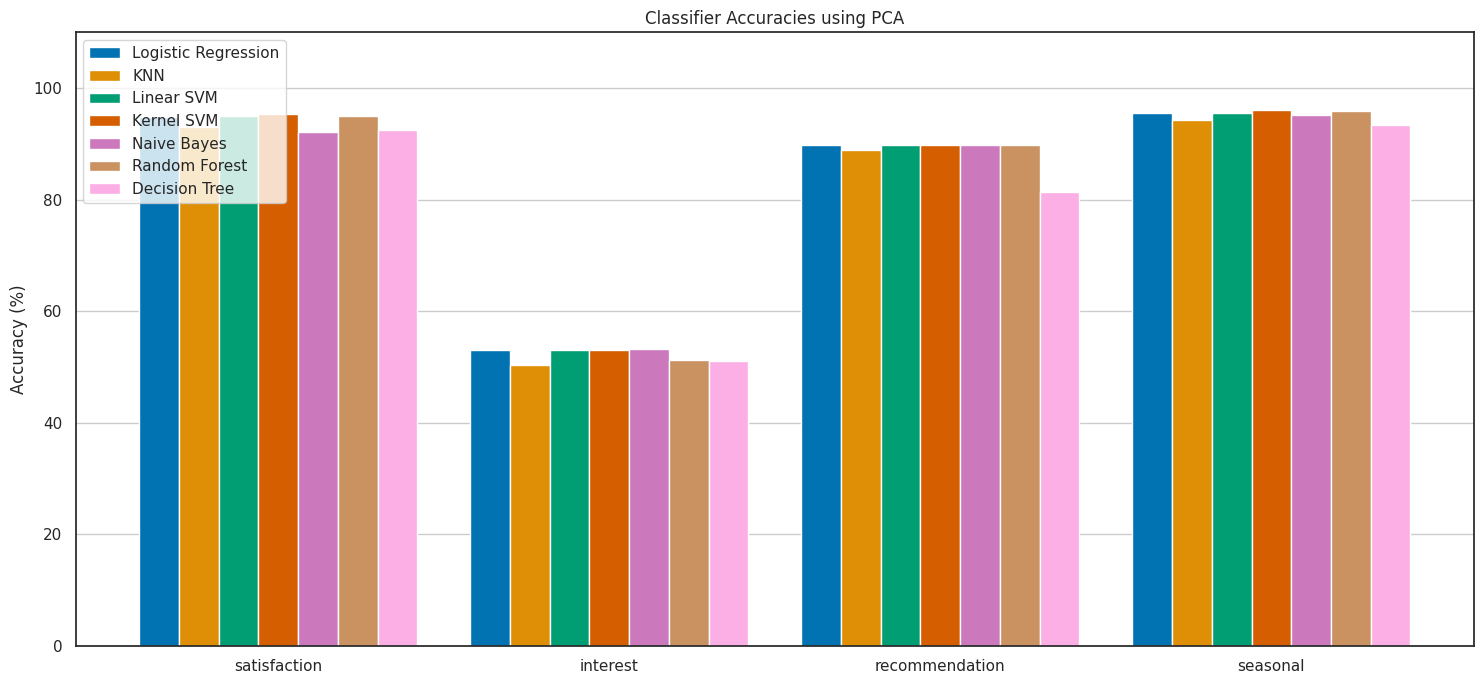

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define accuracy results from PCA
pca_accuracies = {
    "satisfaction": {
        "Logistic Regression": 94.90,
        "KNN": 92.99,
        "Linear SVM": 94.91,
        "Kernel SVM": 95.31,
        "Naive Bayes": 92.17,
        "Random Forest": 95.07,
        "Decision Tree": 92.44
    },
    "interest": {
        "Logistic Regression": 53.11,
        "KNN": 50.42,
        "Linear SVM": 53.11,
        "Kernel SVM": 53.06,
        "Naive Bayes": 53.19,
        "Random Forest": 51.27,
        "Decision Tree": 51.09
    },
    "recommendation":{
        "Logistic Regression": 89.85,
        "KNN": 88.93,
        "Linear SVM": 89.85,
        "Kernel SVM": 89.85,
        "Naive Bayes": 89.85,
        "Random Forest": 89.84,
        "Decision Tree": 81.33

    },
    "seasonal": {
        "Logistic Regression": 95.53,
        "KNN": 94.29,
        "Linear SVM": 95.54,
        "Kernel SVM": 95.99,
        "Naive Bayes": 95.19,
        "Random Forest": 95.82,
        "Decision Tree": 93.37
    }
}

# accuracies for PCA
def plot_accuracies(accuracies, title):
    labels = list(accuracies.keys())
    logistic = [accuracies[key]["Logistic Regression"] for key in labels]
    knn = [accuracies[key]["KNN"] for key in labels]
    linear_svm = [accuracies[key]["Linear SVM"] for key in labels]
    kernel_svm = [accuracies[key]["Kernel SVM"] for key in labels]
    naive_bayes = [accuracies[key]["Naive Bayes"] for key in labels]
    random_forest = [accuracies[key]["Random Forest"] for key in labels]
    decision_tree = [accuracies[key]["Decision Tree"] for key in labels]

    x = np.arange(len(labels))
    width = 0.12

    fig, ax = plt.subplots(figsize=(15, 7))
    rects1 = ax.bar(x - 3*width, logistic, width, label='Logistic Regression')
    rects2 = ax.bar(x - 2*width, knn, width, label='KNN')
    rects3 = ax.bar(x - width, linear_svm, width, label='Linear SVM')
    rects4 = ax.bar(x, kernel_svm, width, label='Kernel SVM')
    rects5 = ax.bar(x + width, naive_bayes, width, label='Naive Bayes')
    rects6 = ax.bar(x + 2*width, random_forest, width, label='Random Forest')
    rects7 = ax.bar(x + 3*width, decision_tree, width, label='Decision Tree')

    ax.set_ylabel('Accuracy (%)')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper left')
    ax.set_ylim([0, 110])

    fig.tight_layout()
    plt.grid(axis='y')
    plt.show()

plot_accuracies(pca_accuracies, 'Classifier Accuracies using PCA')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


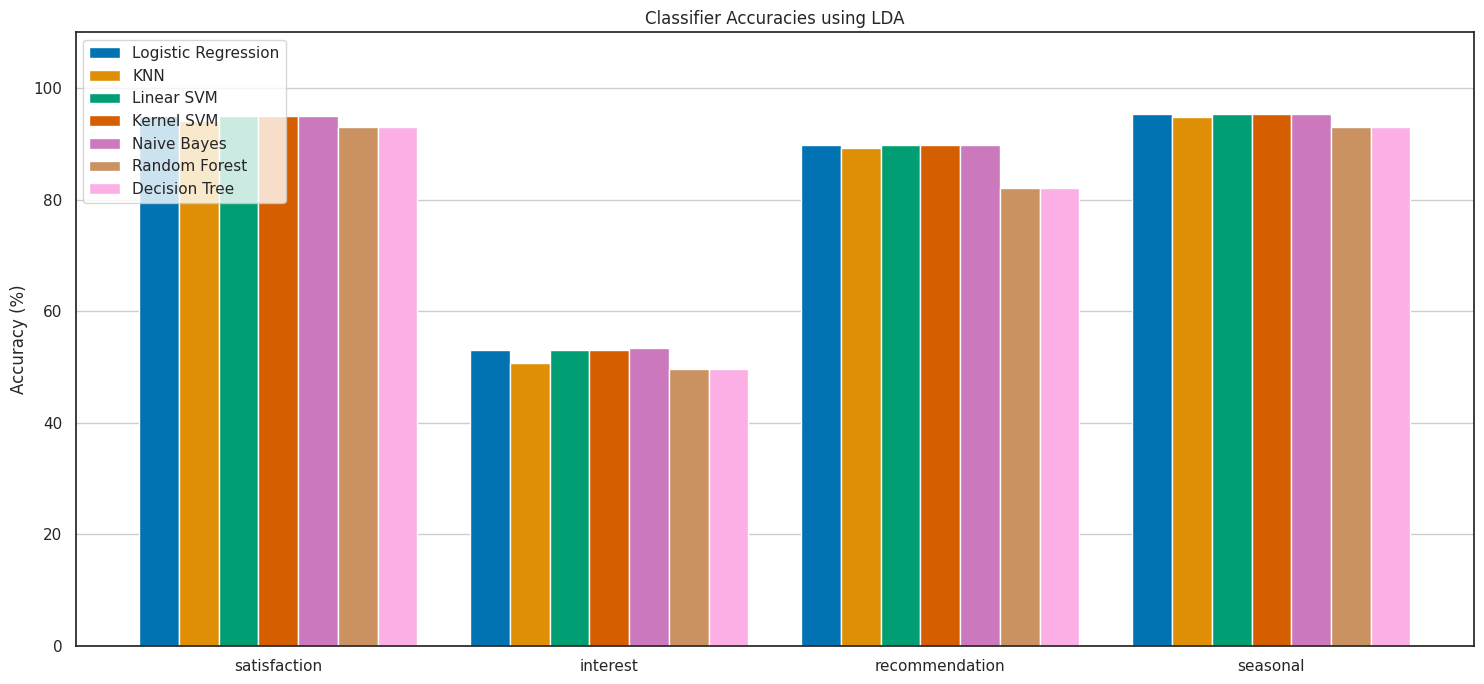

In [ ]:
accuracy results from LDA
lda_accuracies = {
    "satisfaction": {
        "Logistic Regression": 94.92,
        "KNN": 94.06,
        "Linear SVM": 94.92,
        "Kernel SVM": 94.92,
        "Naive Bayes": 94.92,
        "Random Forest": 93.03,
        "Decision Tree": 93.03
    },
    "interest": {
        "Logistic Regression": 53.10,
        "KNN": 50.79,
        "Linear SVM": 53.11,
        "Kernel SVM": 53.08,
        "Naive Bayes": 53.35,
        "Random Forest": 49.70,
        "Decision Tree": 49.68
    },
    "recommendation": {
        "Logistic Regression": 89.85,
        "KNN": 89.31,
        "Linear SVM": 89.85,
        "Kernel SVM": 89.85,
        "Naive Bayes": 89.85,
        "Random Forest": 82.13,
        "Decision Tree": 82.13
    },
    "seasonal": {
        "Logistic Regression": 95.29,
        "KNN": 94.80,
        "Linear SVM": 95.30,
        "Kernel SVM": 95.32,
        "Naive Bayes": 95.32,
        "Random Forest": 92.95,
        "Decision Tree": 92.95
    }
}

plot_accuracies(lda_accuracies, 'Classifier Accuracies using LDA')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


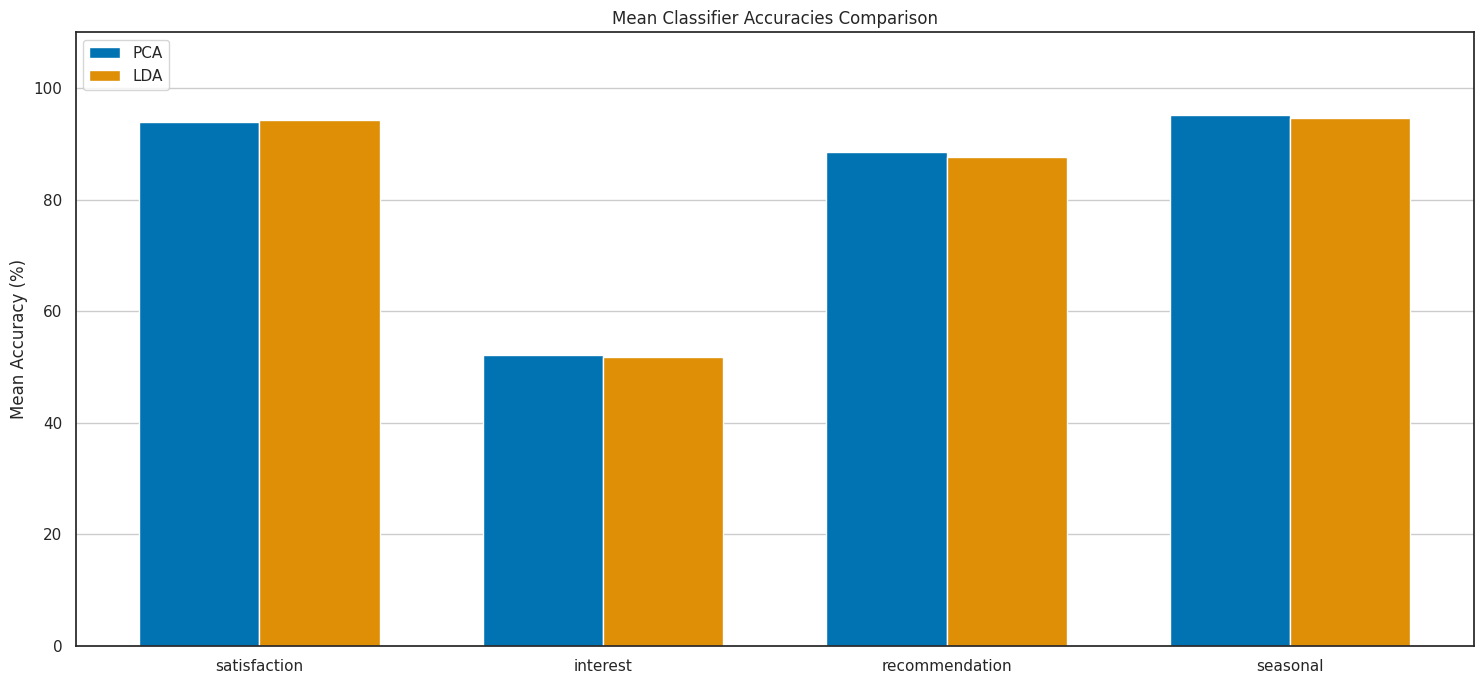

In [ ]:
def plot_accuracies_comparison(accuracies1, accuracies2, title1, title2):
    labels = list(accuracies1.keys())

    # calculating mean accuracies for PCA and LDA
    mean_accuracies1 = [np.mean(list(accuracies1[key].values())) for key in labels]
    mean_accuracies2 = [np.mean(list(accuracies2[key].values())) for key in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(15, 7))

    rects1 = ax.bar(x - width/2, mean_accuracies1, width, label=title1)
    rects2 = ax.bar(x + width/2, mean_accuracies2, width, label=title2)

    ax.set_ylabel('Mean Accuracy (%)')
    ax.set_title('Mean Classifier Accuracies Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper left')
    ax.set_ylim([0, 110])

    fig.tight_layout()
    plt.grid(axis='y')
    plt.show()

plot_accuracies_comparison(pca_accuracies, lda_accuracies, 'PCA', 'LDA')

### Market Basket Analysis

In [ ]:
mba_data = df_encoded[[col for col in df_encoded.columns if 'Category_' in col or 'Style Attributes_' in col]]
mba_data.head()

,Category_Activewear,Category_Bottoms,Category_Dresses,Category_Footwear,Category_Jewelry,Category_Lingerie,Category_Outerwear,Category_Swimwear,Category_Tops,Style Attributes_Casual,Style Attributes_Edgy,Style Attributes_Formal,Style Attributes_Glamorous,Style Attributes_Minimalist,Style Attributes_Preppy,Style Attributes_Sporty,Style Attributes_Streetwear,Style Attributes_Vintage
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(mba_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
rules.sort_values(by='lift', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Style Attributes_Preppy),(Category_Dresses),0.098251,0.099462,0.011268,0.114687,1.153073,0.001496,1.017197,0.147216
1,(Category_Dresses),(Style Attributes_Preppy),0.099462,0.098251,0.011268,0.113290,1.153073,0.001496,1.016961,0.147414
2,(Category_Outerwear),(Style Attributes_Casual),0.100740,0.098318,0.010965,0.108848,1.107100,0.001061,1.011816,0.107577
3,(Style Attributes_Casual),(Category_Outerwear),0.098318,0.100740,0.010965,0.111529,1.107100,0.001061,1.012144,0.107288


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(mba_data, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules.sort_values(by='confidence', ascending=False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(Style Attributes_Preppy),(Category_Dresses),0.098251,0.099462,0.011268,0.114687,1.153073,0.001496,1.017197,0.147216
26,(Category_Dresses),(Style Attributes_Preppy),0.099462,0.098251,0.011268,0.113290,1.153073,0.001496,1.016961,0.147414
51,(Style Attributes_Casual),(Category_Outerwear),0.098318,0.100740,0.010965,0.111529,1.107100,0.001061,1.012144,0.107288
30,(Style Attributes_Edgy),(Category_Footwear),0.099529,0.101951,0.011066,0.111186,1.090586,0.000919,1.010391,0.092243
35,(Category_Footwear),(Style Attributes_Sporty),0.101951,0.102489,0.011335,0.111184,1.084842,0.000886,1.009783,0.087085


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


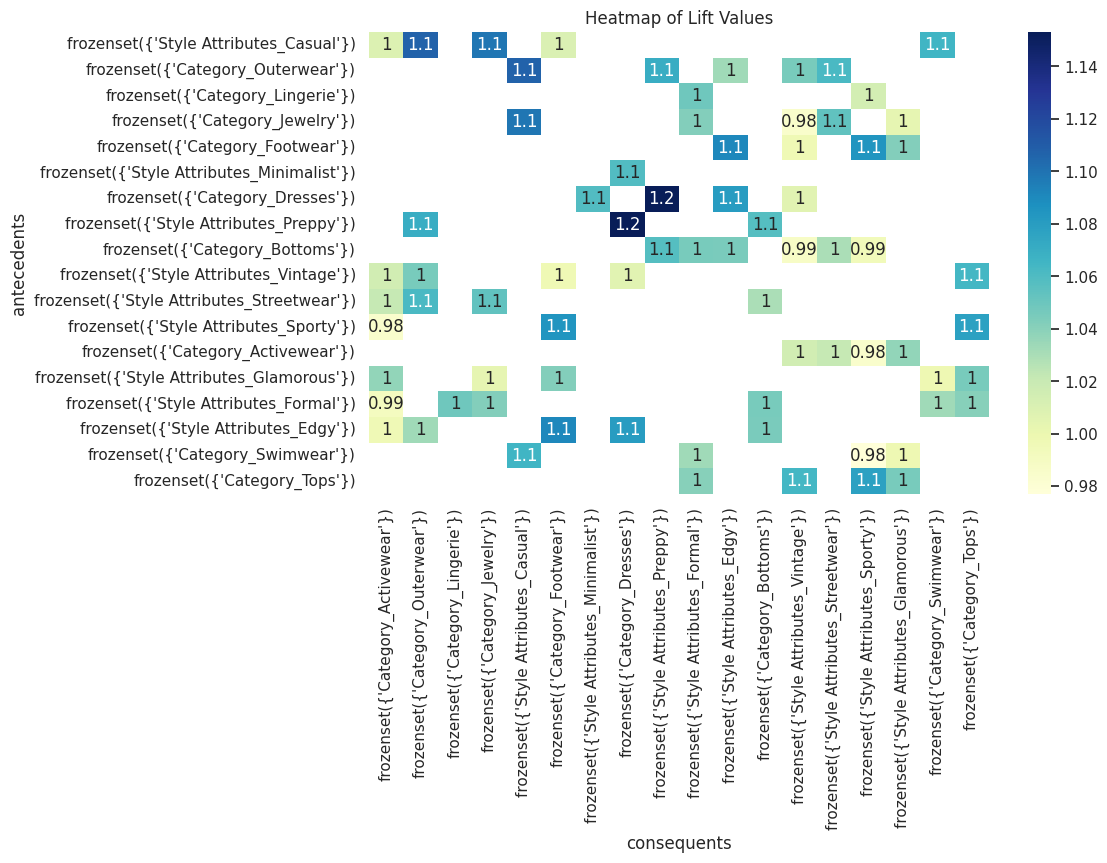

In [ ]:
#heatmap

import seaborn as sns
import matplotlib.pyplot as plt
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Lift Values')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


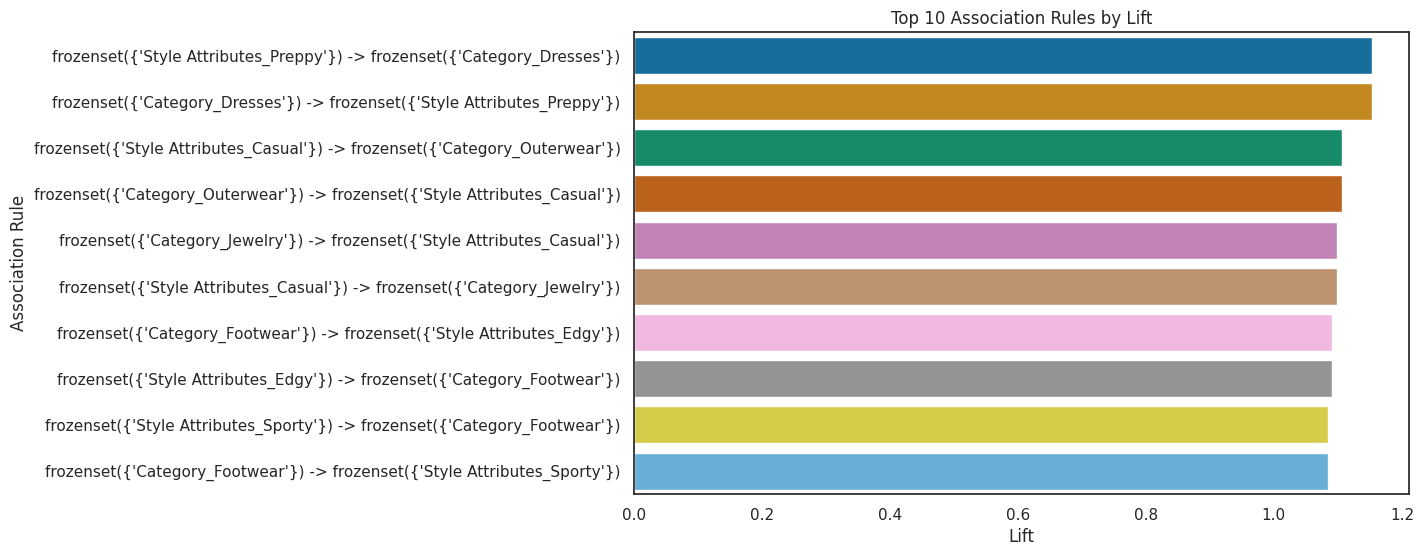

In [ ]:
# bar chart
# Sort rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rules['lift'], y=top_rules['antecedents'].astype(str) + ' -> ' + top_rules['consequents'].astype(str))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Association Rule')
plt.show()
